In [26]:
from grid import Grid
from simulation import Simulation
# from simulation_evolve import Simulation
import time
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

### OFAT

Example how to run OFAT using num_agents as parameter to vary

In [ ]:
# Ensure the directory exists for saving the results
save_dir = "ofat_results"
os.makedirs(save_dir, exist_ok=True)


In [18]:
baseline_params = {
    'num_agents': 50,
    'n_timesteps': 500,
    'num_resources': 500,
    'lifetime_mean': 80,
    'lifetime_std': 10,
    'resource_spawn_rate': 0.5,
    'order_expiry_time': 5,
    'tax_period': 3,
    'income_per_timestep': 3
}

In [42]:
# Define the variable range
num_agents_range = range(10, 60, 10) # 5 parameters from 10 to 50

# Initialize the grid
grid = Grid(width=60, height=60, house_cost=(2, 2))

# Run simulations
for num_agents in num_agents_range:
    sim = Simulation(
        num_agents=num_agents,
        grid=grid,
        n_timesteps=baseline_params['n_timesteps'],
        num_resources=baseline_params['num_resources'],
        lifetime_mean=baseline_params['lifetime_mean'],
        lifetime_std=baseline_params['lifetime_std'],
        resource_spawn_rate=baseline_params['resource_spawn_rate'],
        order_expiry_time=baseline_params['order_expiry_time'],
        tax_period=baseline_params['tax_period'],
        income_per_timestep=baseline_params['income_per_timestep'],
        show_time=True,
        dynamic_tax=True,
        dynamic_market=True
    )
    sim.run()
    sim.save_results(f'ofat_results/num_agents_{num_agents}_analysis.csv')

Current timestep: 100
Current timestep: 200
Current timestep: 300
Current timestep: 400
Current timestep: 500
Current timestep: 100
Current timestep: 200
Current timestep: 300
Current timestep: 400
Current timestep: 500
Current timestep: 100
Current timestep: 200
Current timestep: 300
Current timestep: 400
Current timestep: 500
Current timestep: 100
Current timestep: 200
Current timestep: 300
Current timestep: 400
Current timestep: 500
Current timestep: 100
Current timestep: 200
Current timestep: 300
Current timestep: 400
Current timestep: 500


In [34]:
# Example of how the df looks like that is saved
df = pd.read_csv('ofat_results/num_agents_10_analysis.csv')
df.head()

,timestep,agent_id,wealth,houses,wood,stone,income,position,action
0,1,1,17.0,0,0,0,0.0,"(19, 0)",buy
1,1,2,41.0,0,0,0,0.0,"(24, 29)",move
2,1,3,37.0,0,0,0,0.0,"(11, 38)",move
3,1,4,39.0,0,0,0,0.0,"(4, 9)",move
4,1,5,47.0,0,0,0,0.0,"(26, 9)",buy


### Get whatever results you need here and look at simulation.py how to obtain/plot what you need

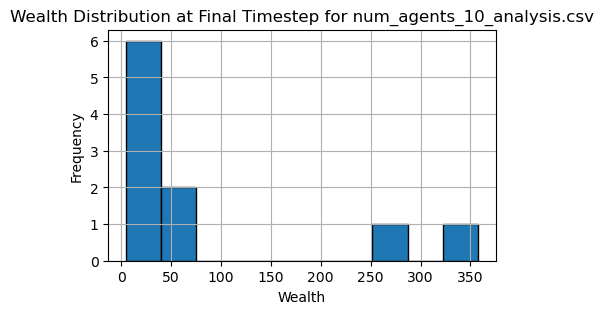

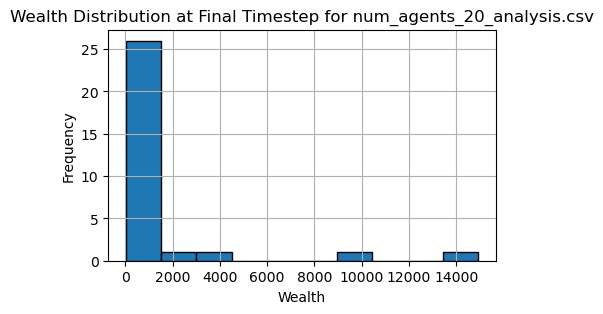

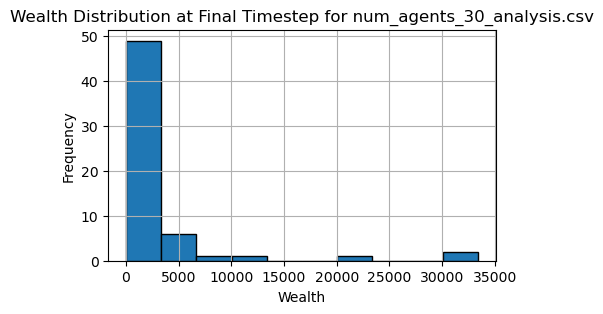

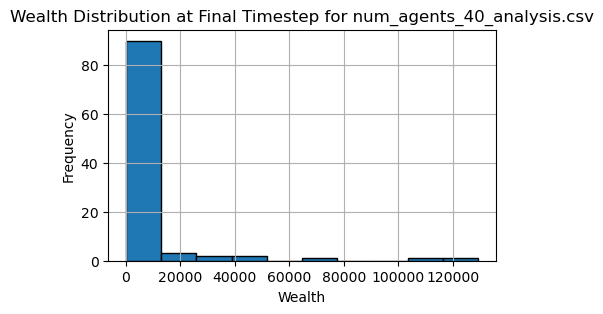

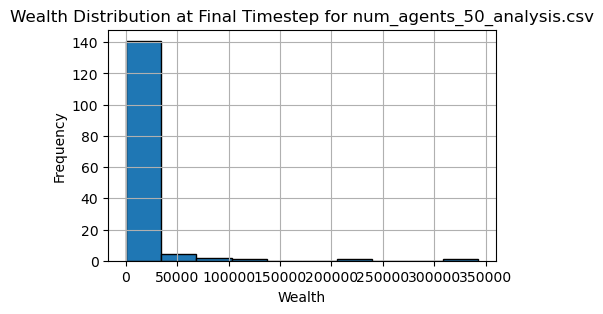

In [43]:
# Directory where the results are saved
results_dir = 'ofat_results'

# List all files in the directory
file_list = os.listdir(results_dir)

# Loop over the files
for file_name in file_list:
    if file_name.endswith('.csv'):
        file_path = os.path.join(results_dir, file_name)
        
        # Read the CSV file into a DataFrame
        data = pd.read_csv(file_path)
        
#         # Print some basic information 
#         print(f"Analysis of file: {file_name}")
#         print("-------------------------------")
#         print("Summary Statistics:")
#         print(data.describe()) 
        
        # Add more complex analysis here 
        # Determine the final timestep
        final_timestep = data['timestep'].max()

        # Select data at the final timestep
        final_data = data[data['timestep'] == final_timestep]

        # Check if 'wealth' column is available and plot the histogram
        if 'wealth' in final_data.columns:
            plt.figure(figsize=(5, 3))
            plt.hist(final_data['wealth'], bins=10, edgecolor='black')
            plt.xlabel('Wealth')
            plt.ylabel('Frequency')
            plt.title(f'Wealth Distribution at Final Timestep for {file_name}')
            plt.grid(True)
            plt.show()
        

In [8]:
# Number of samples for each parameter
N = 1000

# Define the parameter space given distributions
parameter_space = {
    'num_agents': np.random.randint(10, 100, size=N),  # uniform distribution from 10 to 99
    'n_timesteps': np.random.randint(100, 1000, size=N),  # Discrete uniform distribution from 100 to 999
    'num_resources': np.random.randint(100, 1000, size=N),  # Discrete uniform distribution from 100 to 999
    'wood_rate': np.random.uniform(0.5, 2.5, size=N),  # Continuous uniform distribution from 0.5 to 2.5
    'stone_rate': np.random.uniform(0.5, 2.5, size=N),  # Continuous uniform distribution from 0.5 to 2.5
    'lifetime_mean': np.random.normal(80, 10, size=N),  # Normal distribution with mean 80 and stddev 10
    'lifetime_std': np.random.uniform(5, 15, size=N),  # Continuous uniform distribution from 5 to 15
    'resource_spawn_rate': np.random.uniform(0.1, 1.0, size=N),  # Continuous uniform distribution from 0.1 to 1.0
    'order_expiry_time': np.random.randint(1, 10, size=N),  # Discrete uniform distribution from 1 to 9
    'tax_period': np.random.randint(1, 5, size=N),  # Discrete uniform distribution from 1 to 4
    'income_per_timestep': np.random.uniform(0.5, 3.0, size=N)  # Continuous uniform distribution from 0.5 to 3.0
}

# Initialize grid
height = 40
width = 40
house_cost = (2, 2)
grid = Grid(width, height, house_cost)

In [10]:
for i in range(N):
    sim_params = {key: parameter_space[key][i] for key in parameter_space}
    sim = Simulation(**sim_params, grid = grid)
    sim.run()  # Run the simulation
    # Here, collect results or perform analyses as required

Current timestep: 100
Current timestep: 200
Current timestep: 300
Current timestep: 400
Current timestep: 500
Current timestep: 600
Current timestep: 700
Current timestep: 800
Current timestep: 900
Current timestep: 100
Current timestep: 200
Current timestep: 300
Current timestep: 400
Current timestep: 500
Current timestep: 600
Current timestep: 100
Current timestep: 200


KeyboardInterrupt: 